# Mask R-CNN - Test on COCO Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os, random, pprint
sys.path.append('../')

import tensorflow as tf
import keras.backend as KB
import numpy as np
import skimage.io

import mrcnn.visualize as visualize
import mrcnn.utils as utils

from mrcnn.datagen         import data_generator, load_image_gt
from mrcnn.callbacks       import get_layer_output_1,get_layer_output_2
from mrcnn.utils           import mask_string, parse_image_meta, apply_box_deltas_tf
from mrcnn.prep_notebook   import mrcnn_coco_test, mrcnn_coco_train
from mrcnn.utils           import log

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)
## At this point, no default session exists

Using TensorFlow backend.


 Initialize CocoConfig object - super
 Linx  Linux
Tensorflow Version: 1.8.0   Keras Version : 2.1.6 


In [ ]:
# print(KB.query_session())
# print(tf.get_default_session())
# print(tf.get_default_graph()) 
# KB.clear_session()

In [2]:
mrcnn_model, dataset_test, test_generator, mrcnn_config = mrcnn_coco_test(mode = 'inference')

>>> Initialize ModelBase model 
   Mode:  inference
   Model dir :  /users/students/r0653928/models/train_mrcnn_coco
>>> ModelBase initialiation complete
>>> ---Initialize MRCNN model, mode:  inference

----------------------------
>>> Resnet Graph 
----------------------------
     Input_image shape : (?, 1024, 1024, 3)
     After ZeroPadding2D  : (?, 1030, 1030, 3) (?, 1030, 1030, 3)
     After Conv2D padding : (?, 512, 512, 64) (?, 512, 512, 64)
     After BatchNorm      : (?, 512, 512, 64) (?, 512, 512, 64)
     C1 Shape: (?, 256, 256, 64) (?, 256, 256, 64)
     C2 Shape:  (?, 256, 256, 256) (?, 256, 256, 256)
     C3 Shape:  (?, 128, 128, 512) (?, 128, 128, 512)
     C4 Shape:  (?, 64, 64, 1024) (?, 64, 64, 1024)
     C5 Shape:  (?, 32, 32, 2048) (?, 32, 32, 2048)

>>> Feature Pyramid Network (FPN) Graph 
     FPN P2 shape : (None, 256, 256, 256)
     FPN P3 shape : (None, 128, 128, 256)
     FPN P4 shape : (None, 64, 64, 256)
     FPN P5 shape : (None, 32, 32, 256)
     FPN P6 sh

####  Load Model Weights

In [3]:
# exclude=["mrcnn_class_logits"] # ,"mrcnn_bbox_fc"]   #, "mrcnn_bbox", "mrcnn_mask"])
mrcnn_model.load_model_weights(init_with = 'last', exclude = None)  

-----------------------------------------------
 Load Model with init parm: [ last ]
-----------------------------------------------
 ---> last
>>> find_last checkpoint in :  /users/students/r0653928/models/train_mrcnn_coco
 Key : > mrcnn <
 Dir names:  ['mrcnn20181012T1227', 'mrcnn20181011T1730', 'mrcnn20181013T1338', 'mrcnn20181014T1422', 'mrcnn20181011T2049']
 Folder:  /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181014T1422  Checkpoints:  []
 Folder:  /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181013T1338  Checkpoints:  ['mrcnn_0011.h5', 'mrcnn_0026.h5', 'mrcnn_0027.h5', 'mrcnn_0028.h5']
    find_last():   dir_name: /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181013T1338
    find_last(): checkpoint: /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181013T1338/mrcnn_0028.h5
   Last file is : /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181013T1338/mrcnn_0028.h5
>>> find_last checkpoint in :  /users/students/r0653928/models/train_

162 res4i_branch2a            Model Layer Name/Type : [('res4i_branch2a', <keras.layers.convolutional.Conv2D object at 0x7f0656d03c18>)] 
                              Weights     : ['res4i_branch2a/kernel:0', 'res4i_branch2a/bias:0']
                                0 res4i_branch2a/kernel:0              hdf5 Weights: (1, 1, 1024, 256)  Symbolic Wghts: (1, 1, 1024, 256)
                                1 res4i_branch2a/bias:0                hdf5 Weights: (256,)  Symbolic Wghts: (256,)

163 bn4i_branch2a             Model Layer Name/Type : [('bn4i_branch2a', <mrcnn.batchnorm_layer.BatchNorm object at 0x7f0656d25eb8>)] 
                              Weights     : ['bn4i_branch2a/gamma:0', 'bn4i_branch2a/beta:0', 'bn4i_branch2a/moving_mean:0', 'bn4i_branch2a/moving_variance:0']
                                0 bn4i_branch2a/gamma:0                hdf5 Weights: (256,)  Symbolic Wghts: (256,)
                                1 bn4i_branch2a/beta:0                 hdf5 Weights: (256,)  Symbol

208 res4m_branch2c            Model Layer Name/Type : [('res4m_branch2c', <keras.layers.convolutional.Conv2D object at 0x7f065690d7f0>)] 
                              Weights     : ['res4m_branch2c/kernel:0', 'res4m_branch2c/bias:0']
                                0 res4m_branch2c/kernel:0              hdf5 Weights: (1, 1, 256, 1024)  Symbolic Wghts: (1, 1, 256, 1024)
                                1 res4m_branch2c/bias:0                hdf5 Weights: (1024,)  Symbolic Wghts: (1024,)

209 bn4m_branch2c             Model Layer Name/Type : [('bn4m_branch2c', <mrcnn.batchnorm_layer.BatchNorm object at 0x7f065691be48>)] 
                              Weights     : ['bn4m_branch2c/gamma:0', 'bn4m_branch2c/beta:0', 'bn4m_branch2c/moving_mean:0', 'bn4m_branch2c/moving_variance:0']
                                0 bn4m_branch2c/gamma:0                hdf5 Weights: (1024,)  Symbolic Wghts: (1024,)
                                1 bn4m_branch2c/beta:0                 hdf5 Weights: (1024,)  S

                              Weights     : ['mrcnn_class_conv1/kernel:0', 'mrcnn_class_conv1/bias:0']
                                0 mrcnn_class_conv1/kernel:0           hdf5 Weights: (7, 7, 256, 1024)  Symbolic Wghts: (7, 7, 256, 1024)
                                1 mrcnn_class_conv1/bias:0             hdf5 Weights: (1024,)  Symbolic Wghts: (1024,)

369 mrcnn_class_bn1           Model Layer Name/Type : [('mrcnn_class_bn1', <keras.layers.wrappers.TimeDistributed object at 0x7f06556cf8d0>)] 
                              Weights     : ['mrcnn_class_bn1/gamma:0', 'mrcnn_class_bn1/beta:0', 'mrcnn_class_bn1/moving_mean:0', 'mrcnn_class_bn1/moving_variance:0']
                                0 mrcnn_class_bn1/gamma:0              hdf5 Weights: (1024,)  Symbolic Wghts: (1024,)
                                1 mrcnn_class_bn1/beta:0               hdf5 Weights: (1024,)  Symbolic Wghts: (1024,)
                                2 mrcnn_class_bn1/moving_mean:0        hdf5 Weights: (1024,) 

##  Print some information about the model 

In [4]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
    print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

377
 layer: 200 name: add_19
-------------------------------------------
 layer: 201 name: res4l_out
-------------------------------------------
 layer: 202 name: res4m_branch2a
-------------------------------------------
 layer: 203 name: bn4m_branch2a
-------------------------------------------
 layer: 204 name: activation_40
-------------------------------------------
 layer: 205 name: res4m_branch2b
-------------------------------------------
 layer: 206 name: bn4m_branch2b
-------------------------------------------
 layer: 207 name: activation_41
-------------------------------------------
 layer: 208 name: res4m_branch2c
-------------------------------------------
 layer: 209 name: bn4m_branch2c
-------------------------------------------
 layer: 210 name: add_20
-------------------------------------------
 layer: 211 name: res4m_out
-------------------------------------------
 layer: 212 name: res4n_branch2a
-------------------------------------------
 layer: 213 name: bn4n_bra

####  Print Layer & Weight Info

In [13]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:3d} {:20s} Weights: {}'.format(i, layers[i].name, len(layers[i].weights))) ## [weight.name for weight in layers[i].weights]))
    print('{:23s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:25s} {:30s} {}  '.format(' ',weight.name,  weight.shape))



  0 input_image          Weights: 0
                         Trainable: [] 

  1 zero_padding2d_1     Weights: 0
                         Trainable: [] 

  2 conv1                Weights: 2
                         Trainable: ['conv1/kernel:0', 'conv1/bias:0'] 
                          conv1/kernel:0                 (7, 7, 3, 64)  
                          conv1/bias:0                   (64,)  

  3 bn_conv1             Weights: 4
                         Trainable: ['bn_conv1/gamma:0', 'bn_conv1/beta:0'] 
                          bn_conv1/gamma:0               (64,)  
                          bn_conv1/beta:0                (64,)  
                          bn_conv1/moving_mean:0         (64,)  
                          bn_conv1/moving_variance:0     (64,)  

  4 activation_1         Weights: 0
                         Trainable: [] 

  5 max_pooling2d_1      Weights: 0
                         Trainable: [] 

  6 res2a_branch2a       Weights: 2
                         Trainabl

####  More layer information

In [14]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
## Get weieights acturally returns weight dims
# print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# for i,j in enumerate(mrcnn_model.keras_model.weights):
#     print(i, j) # j.name, j.shape, j.dtype)
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(type(mrcnn_model.keras_model.get_weights()))

# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])


 Inputs: 
[ <tf.Tensor 'input_image:0' shape=(?, 1024, 1024, 3) dtype=float32>,
  <tf.Tensor 'input_image_meta:0' shape=(?, ?) dtype=float32>]

 Outputs: 
[ <tf.Tensor 'mrcnn_detection/PyFunc:0' shape=<unknown> dtype=float32>,
  <tf.Tensor 'ROI/rpn_roi_proposals:0' shape=(1, ?, ?) dtype=float32>,
  <tf.Tensor 'mrcnn_class/Reshape_1:0' shape=(?, 1000, 81) dtype=float32>,
  <tf.Tensor 'mrcnn_bbox/Reshape:0' shape=(?, 1000, 81, 4) dtype=float32>]

 Weights: 
 length of model.keras_model.weights 662


#### Loaded dataset information

In [16]:
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
# for i, info in enumerate(dataset_test.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

Testing Dataset Image Count: 40137
Testing Dataset Class Count: 81


#### List trainable layers using `get_trainable_layers()`

In [17]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

 Layer: conv1
 Layer: bn_conv1
 Layer: res2a_branch2a
 Layer: bn2a_branch2a
 Layer: res2a_branch2b
 Layer: bn2a_branch2b
 Layer: res2a_branch2c
 Layer: res2a_branch1
 Layer: bn2a_branch2c
 Layer: bn2a_branch1
 Layer: res2b_branch2a
 Layer: bn2b_branch2a
 Layer: res2b_branch2b
 Layer: bn2b_branch2b
 Layer: res2b_branch2c
 Layer: bn2b_branch2c
 Layer: res2c_branch2a
 Layer: bn2c_branch2a
 Layer: res2c_branch2b
 Layer: bn2c_branch2b
 Layer: res2c_branch2c
 Layer: bn2c_branch2c
 Layer: res3a_branch2a
 Layer: bn3a_branch2a
 Layer: res3a_branch2b
 Layer: bn3a_branch2b
 Layer: res3a_branch2c
 Layer: res3a_branch1
 Layer: bn3a_branch2c
 Layer: bn3a_branch1
 Layer: res3b_branch2a
 Layer: bn3b_branch2a
 Layer: res3b_branch2b
 Layer: bn3b_branch2b
 Layer: res3b_branch2c
 Layer: bn3b_branch2c
 Layer: res3c_branch2a
 Layer: bn3c_branch2a
 Layer: res3c_branch2b
 Layer: bn3c_branch2b
 Layer: res3c_branch2c
 Layer: bn3c_branch2c
 Layer: res3d_branch2a
 Layer: bn3d_branch2a
 Layer: res3d_branch2b
 Laye

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

## Detection

In [18]:
### Display loaded shapes
test_batch_x, test_batch_y = next(test_generator)

Image id   :  24127
Image meta :  [24127   400   400     3   112   112   912   912     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1]
Class_ids  :  (2,)
Class_ids  :  [ 2 75]


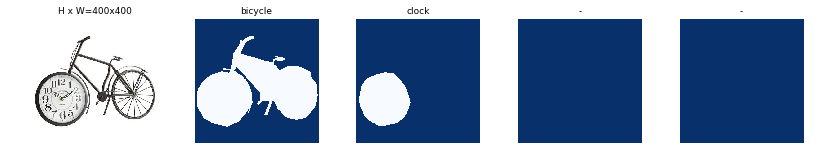

 display_instances() : Image shape:  (400, 400, 3)


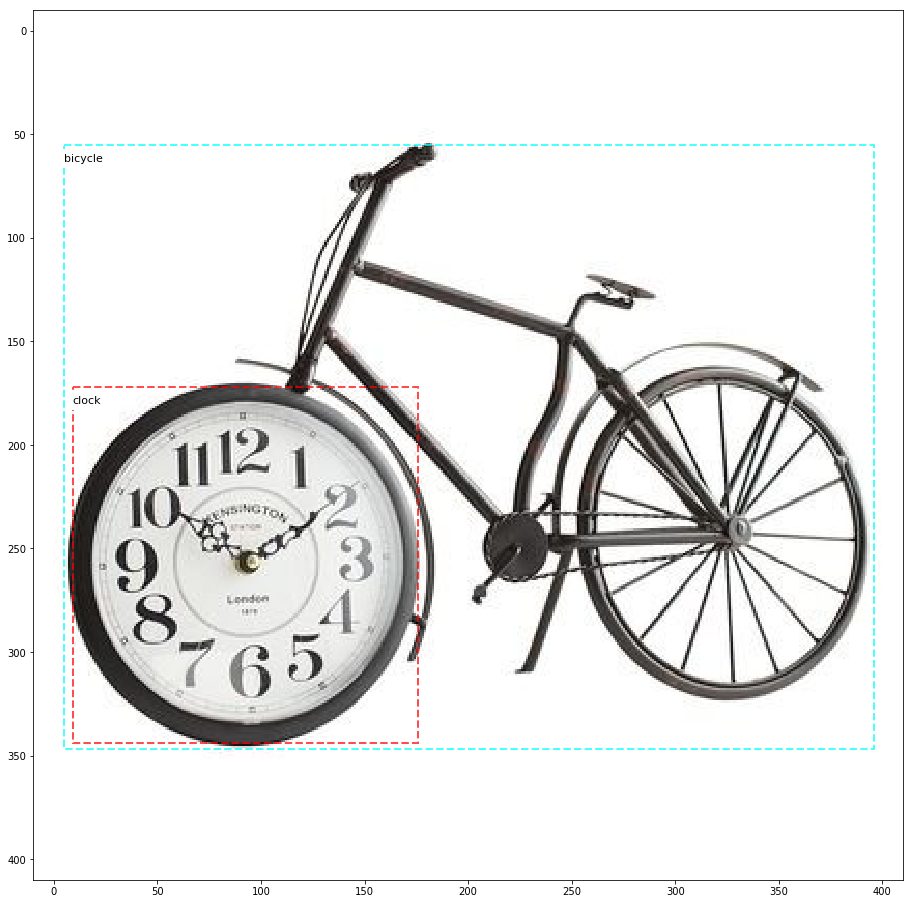

In [19]:
# 22380 , 28614
# persons : 30531
test_batch_x, test_batch_y = next(test_generator)
imgmeta_idx = mrcnn_model.keras_model.input_names.index('input_image_meta')
img_meta    = test_batch_x[imgmeta_idx]
class_names = dataset_test.class_names

for img_idx in range(mrcnn_config.BATCH_SIZE):
    image_id = img_meta[img_idx,0]
    image    = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    bbox = utils.extract_bboxes(mask)

    print('Image id   : ',image_id)
    print('Image meta : ', img_meta[img_idx])
    print('Class_ids  : ',class_ids.shape)
    print('Class_ids  : ',class_ids)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)
    # visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
    visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

#### Load a specific image using `data_gen_simulate`

 Converted to image index -->  [18103]
 batch size is : 1
 load image ud:  18103
Image id   :  18103
Image meta :  [18103   428   640     3   169     0   854  1024     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1]
Class_ids  :  (2,)


/users/students/r0653928/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


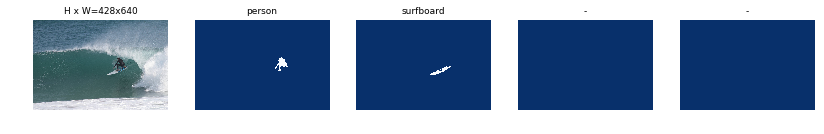

 display_instances() : Image shape:  (428, 640, 3)


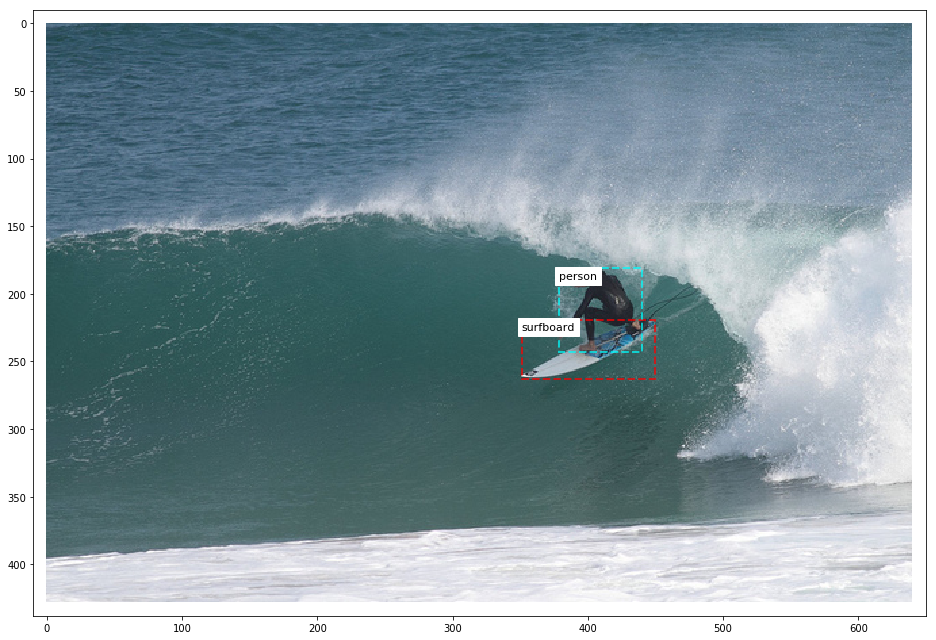

In [22]:
from mrcnn.datagen  import data_gen_simulate    # 13378, 33816
test_x, test_y = data_gen_simulate(dataset_test, mrcnn_config, 18103)
img_meta2    = test_x[imgmeta_idx]
class_names2 = dataset_test.class_names

for img_idx in range(mrcnn_config.BATCH_SIZE):
    image_id2 = img_meta2[img_idx,0]
    image2    = dataset_test.load_image(image_id2)
    mask2, class_ids2 = dataset_test.load_mask(image_id2)
    bbox2 = utils.extract_bboxes(mask2)

    print('Image id   : ', image_id2)
    print('Image meta : ', img_meta2[img_idx])
    print('Class_ids  : ', class_ids2.shape)
    visualize.display_top_masks(image2, mask2, class_ids2, class_names2)
    # visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
    visualize.display_instances(image2, bbox2, class_ids2, class_names2)

####  Compare values returned from Data Generator and `data_gen__simulate`

In [23]:
for i,j in zip(test_x, test_batch_x):
    print(len(i), '--- ', len(j), '      ', i.shape, '---', j.shape)

#     print(np.all(i==j))
ctr = 0 

print(test_x[2].shape[1])
print(np.where(test_x[2][0,:,0] == 1)[0])
test_x_pos = np.where(test_x[2][0,:,0] == 1)[0]
test_x_neg = np.where(test_x[2][0,:,0] == -1)[0]
test_x_nut = np.where(test_x[2][0,:,0] == 0)[0]

test_batch_x_pos = np.where(test_batch_x[2][0,:,0] == 1)[0]
test_batch_x_neg = np.where(test_batch_x[2][0,:,0] == -1)[0]
test_batch_x_nut = np.where(test_batch_x[2][0,:,0] == 0)[0]

for j in range(test_x[2].shape[1]):
    if (test_x[2][0,j,0] == test_batch_x[2][0,j,0]) and (test_x[2][0,j,0] == -1):
        list_1.append(j)
#         print(' j : {}   test_x: {}   test_batcgh_x: {}'.format( j, test_x[2][0,j,0], test_batch_x[2][0,j,0]))
        ctr +=1 
print('total : ', ctr)
print('test_x        pos:{}  neg:{} nut:{}'.format(len(test_x_pos),len(test_x_neg), len(test_x_nut)) )
print('test_batch_x  pos:{}  neg:{} nut:{}'.format(len(test_batch_x_pos),len(test_batch_x_neg), len(test_batch_x_nut)) )
# print(test_x_pos)
# print(test_batch_x_pos)
# print(test_x_neg)
# print(test_batch_x_neg)

1 ---  1        (1, 1024, 1024, 3) --- (1, 1024, 1024, 3)
1 ---  1        (1, 89) --- (1, 89)
1 ---  1        (1, 261888, 1) --- (1, 261888, 1)
1 ---  1        (1, 256, 4) --- (1, 256, 4)
1 ---  1        (1, 100) --- (1, 100)
1 ---  1        (1, 100, 4) --- (1, 100, 4)
261888
[251833 252602]


NameError: name 'list_1' is not defined

## Run Object Detection

###  Test on loaded image

In [ ]:
# run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
# # print(type(run_opts))
# print(dir(run_opts))
# dct = {"options":  run_opts}
# print(dct)
# setattr(mrcnn_model.keras_model, '_function_kwargs', {})
# print(getattr(mrcnn_model.keras_model, '_function_kwargs',{}))

In [24]:
results = mrcnn_model.detect([image], verbose=1)

Processing 1 images
image                    shape: (400, 400, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max:  912.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (1, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (1, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (1, 89) <class 'numpy.ndarray'>


 Detections are:
[[461.     131.     800.     463.      75.       0.9993]
 [279.     151.     791.     881.       2.       0.984 ]]
    return from  predict()
    Length of detections :  1
    Length of rpn_roi_proposals   :  1
    Length of mrcnn_class:  1
    Length of mrcnn_bbox :  1



[174   9 344 175]    75    clock...............  0.9993 
[ 83  19 339 384]     2    bicycle.............  0.9840 
 display_instances() : Image shape:  (400, 400, 3)


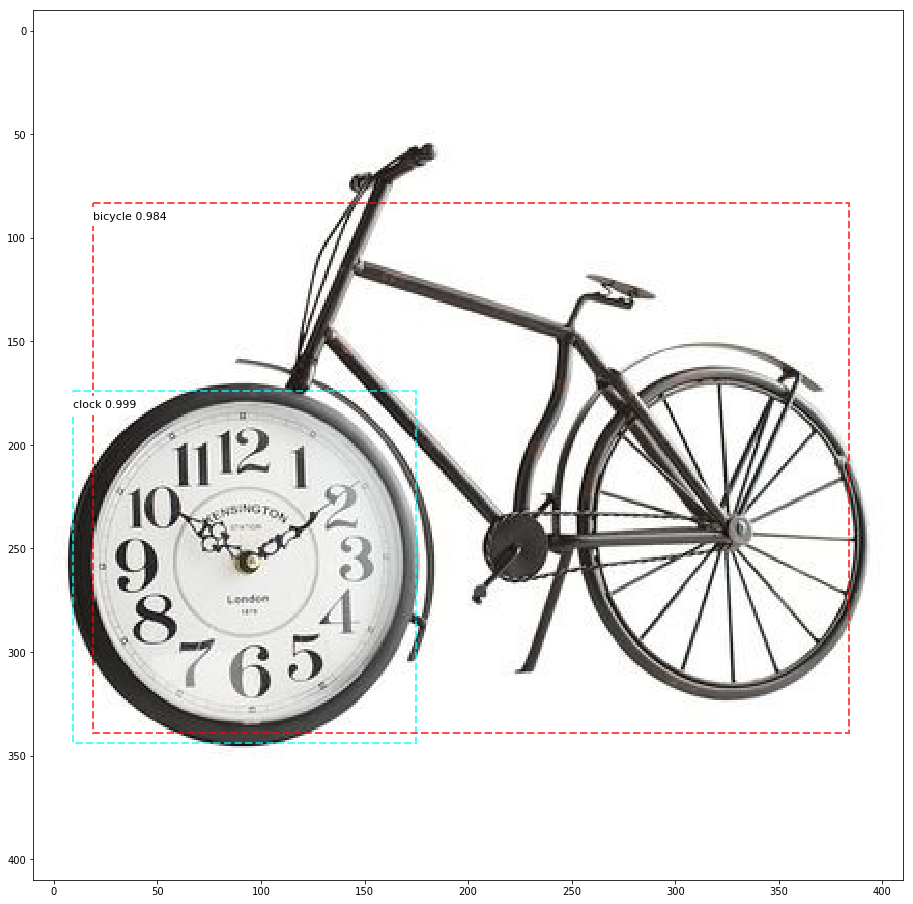

In [25]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
# print('  rois       : ', r['rois'])
# print('  class ids  : ', r['class_ids'])
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'])
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import matplotlib.pyplot as plt
# IMAGE_DIR = '/home/kbardool/git_projs/mrcnn3/images'
IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(9,9))
plt.imshow(image)

In [ ]:
# Run detection
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
# Visualize results
r = results[0]
# print('  rois       : ', r['rois'])
# print('  class ids  : ', r['class_ids'])
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'])
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

image_ids = np.random.choice(dataset_test.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset_test, mrcnn_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(utils.mold_image(image, mrcnn_config), 0)
    # Run object detection
    results = mrcnn_model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

### Get next shapes from generator and display loaded shapes

## Save 

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

## Notebook Preferences

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Configurations

In [ ]:
# from keras import backend as KB
# if 'tensorflow' == KB.backend():
#     import tensorflow as tf
#     from keras.backend.tensorflow_backend import set_session
#     # tfconfig = tf.ConfigProto(
#         # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5),
#         # device_count = {'GPU': 1}
#     # )    
#     tfconfig = tf.ConfigProto()
#     tfconfig.gpu_options.allow_growth=True
#     tfconfig.gpu_options.visible_device_list = "0"
#     tfconfig.gpu_options.per_process_gpu_memory_fraction=0.5
#     tf_sess = tf.Session(config=tfconfig)
#     set_session(tf_sess)

###  Simulation of `detect()` routine

In [ ]:
# print('>>> model detect()')
verbose = 1
images  = [original_image]
assert model.mode   == "inference", "Create model in inference mode."
assert len(images) == model.config.BATCH_SIZE, "len(images) must be equal to BATCH_SIZE"

if verbose:
    log("Processing {} images".format(len(images)))
    for image in images:
        log("image", image)

# Mold inputs to format expected by the neural network
molded_images, image_metas, windows = model.mold_inputs(images)
if verbose:
    log("molded_images", molded_images)
    log("image_metas"  , image_metas)

## Run object detection pipeline
# print('    call predict()')
detections, rpn_rois, rpn_class, rpn_bbox,\
            mrcnn_class, mrcnn_bbox, mrcnn_mask \
                      =  model.keras_model.predict([molded_images, image_metas], verbose=0)

print('    return from  predict()')
print('    Length of detections : ', len(detections))
print('    Length of rpn_rois   : ', len(rpn_rois   ))
print('    Length of rpn_class  : ', len(rpn_class  ))
print('    Length of rpn_bbox   : ', len(rpn_bbox   ))
print('    Length of mrcnn_class: ', len(mrcnn_class))
print('    Length of mrcnn_bbox : ', len(mrcnn_bbox ))
print('    Length of mrcnn_mask : ', len(mrcnn_mask ))

####  detection array layout is `[ y1, x1, y2, x2, class, score]`

detections[0].shape
print(detections[0])

## Process detections
results = []
for i, image in enumerate(images):
    final_rois, final_class_ids, final_scores, final_masks =\
        model.unmold_detections(detections[i], 
                               mrcnn_mask[i],
                               image.shape  ,
                               windows[i])
    results.append({
        "rois"     : final_rois,
        "class_ids": final_class_ids,
        "scores"   : final_scores,
        "masks"    : final_masks,
    })